In [156]:
import pandas as pd
import numpy as np

In [157]:
df_emotion = pd.read_csv("../Data/emotions_kaggle.csv")
df_augmentation = pd.read_csv("../Data/emotions_augmentation.csv")

In [158]:
df_emotion.rename(columns={"Text": "text", "Emotion": "target"}, inplace=True)
df_emotion = df_emotion[df_emotion["target"]!="surprise"]
df_augmentation.rename(columns={"content": "text", "sentiment": "target"}, inplace=True)
df_augmentation.drop(["tweet_id", "author"],axis=1, inplace=True)

In [159]:
df_emotion.drop_duplicates(inplace=True)
df_augmentation.drop_duplicates(inplace=True)

In [160]:
df_augmentation.head(5)

,target,text
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


## Nombre d'émotions dans chaque dataset

In [161]:
print("Emotion:", df_emotion.target.unique())
print(100*'-')
print("Augmentation:", df_augmentation.target.unique())

Emotion: ['sadness' 'anger' 'love' 'fear' 'happy']
----------------------------------------------------------------------------------------------------
Augmentation: ['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']


In [162]:
df_emotion.count()

text      20577
target    20577
dtype: int64

In [163]:
df_emotion.groupby("target").count()["text"]

target
anger      2992
fear       2651
happy      7028
love       1641
sadness    6265
Name: text, dtype: int64

In [164]:
df_augmentation.groupby("target").count()["text"]

target
anger          110
boredom        179
empty          827
enthusiasm     759
fun           1776
happiness     5194
hate          1323
love          3801
neutral       8617
relief        1524
sadness       5160
surprise      2187
worry         8452
Name: text, dtype: int64

Plus d'émotions différentes dans le dataframe augmentation. Deux choix:
* ajouter uniquement les données avec les mêmes sentiments entre les deux df
* ajouter les données avec les mêmes sentiments et rajouter des sentiments supp provenant d'augmentation (neutral et worry)

## Valeurs nulles ou manquantes

In [165]:
print("NaN emotion:\n",df_emotion.isna().sum())
print("Vide emotion:\n",df_emotion[df_emotion["text"]==""].count())
print(100*'-')
print("NaN augmentation:\n",df_augmentation.isna().sum())
print("Vide augmentation:\n",df_augmentation[df_augmentation["text"]==""].count())

NaN emotion:
 text      0
target    0
dtype: int64
Vide emotion:
 text      0
target    0
dtype: int64
----------------------------------------------------------------------------------------------------
NaN augmentation:
 target    0
text      0
dtype: int64
Vide augmentation:
 target    0
text      0
dtype: int64


## Exemple de texte

In [166]:
df_augmentation.head(5)

,target,text
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [167]:
df_emotion.head(5)

,text,target
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


Beaucoup de "I" dans les textes du dataframe kaggle tandis qu'il y a beaucoup d'abbréviation et de @.. dans le dataframe augmentation (tweet)  
Il faudra veiller à traiter les données différemment pour les deux dataframe

## Texthero

In [168]:
import texthero as hero

In [169]:
df_augmentation['clean_text'] = hero.clean(df_augmentation['text'])
df_emotion['clean_text'] = hero.clean(df_emotion['text'])

### Emotion

In [170]:
df_emotion.groupby('target')['clean_text'].apply(lambda x: hero.top_words(x)[:10])

target          
anger    feel       1803
         feeling     923
         like        479
         im          426
         not         349
         really      171
         get         154
         people      150
         know        149
         time        146
fear     feel       1483
         feeling     926
         im          383
         like        323
         not         273
         little      194
         bit         143
         know        139
         really      129
         anxious     126
happy    feel       4947
         feeling    1956
         like       1267
         im         1007
         not         812
         really      381
         time        370
         know        323
         get         311
         make        276
love     feel       1180
         feeling     471
         like        393
         im          251
         not         196
         love        119
         really      112
         know        101
         sweet        84
        

feel, feeling, like, im et know sont des stop words dans ce jeu de données

In [171]:
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
default_stopwords.remove("not")
custom_stopwords = default_stopwords.union(set(["feel", "feeling", "like", "im", "know", "ive", "one", "get", "really",
                                                "bit", "want", "would", "make", "little"]))
df_emotion['clean_text'] = hero.remove_stopwords(df_emotion['clean_text'], custom_stopwords)

KeyError: 'not'

In [ ]:
df_emotion.groupby('target')['clean_text'].apply(lambda x: hero.top_words(x)[:10])

target               
anger     not            349
          people         150
          time           146
          even           125
          angry          116
          think          111
          could          108
          things         105
          way            102
          offended        92
fear      not            273
          anxious        126
          still          119
          time           119
          people         106
          nervous        103
          strange         92
          going           89
          terrified       89
          think           89
happy     not            812
          time           370
          people         266
          good           246
          something      244
          think          239
          pretty         236
          much           235
          life           235
          love           231
love      not            196
          love           119
          sweet           84
          loving     

### Augmentation

On garde happiness, sadness, anger, love, surprise, worry et neutral

In [ ]:
liste = ["happiness", "sadness", "anger", "love", "surprise", "worry", "neutral"]
df_augmentation = df_augmentation[df_augmentation["target"].isin(liste)]

In [ ]:
df_augmentation.groupby('target')['clean_text'].apply(lambda x: hero.top_words(x)[:10])

target       
anger   not       11
        get        8
        quot       8
        good       6
        know       6
                ... 
worry   work     395
        good     394
        got      392
        going    384
        today    378
Name: clean_text, Length: 70, dtype: int64

In [ ]:
custom_stopwords = default_stopwords.union(set(["feel", "feeling", "like", "im", "know", "http", "yeah", "twitter",
                                                "get", "got","com","u", "twitpic", "ur", "n"]))
df_augmentation['clean_text'] = hero.remove_stopwords(df_augmentation['clean_text'], custom_stopwords)

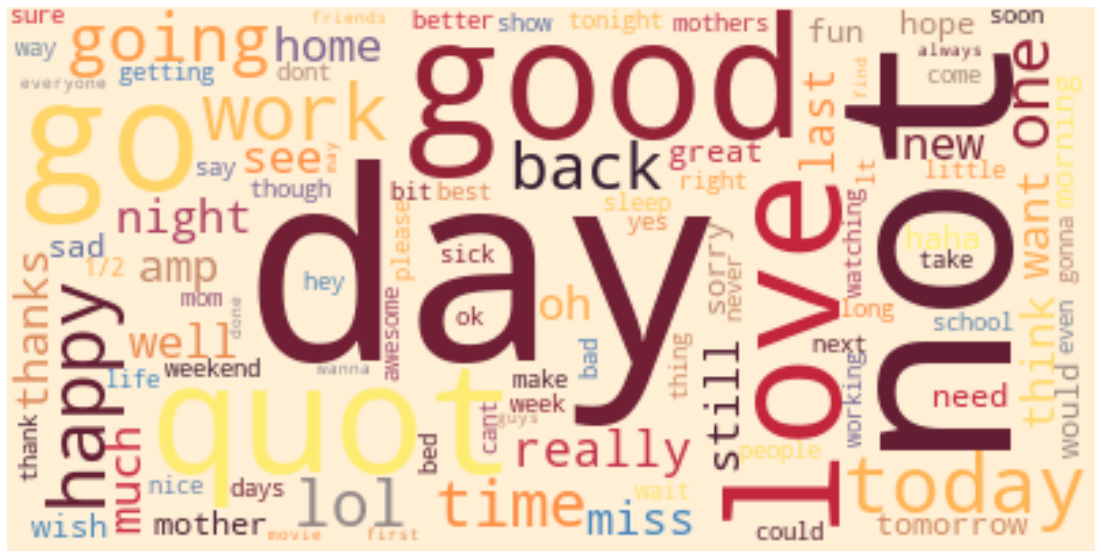

In [ ]:
hero.wordcloud(df_augmentation.clean_text, max_words=100,)

In [ ]:
df_augmentation.to_csv("../Data/Data_cleaned/augmentation_cleaned_rudy.csv", index=False) 
df_emotion.to_csv("../Data/Data_cleaned/emotion_cleaned_rudy.csv", index=False) 